[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/ELMED219-2026/blob/main/Lab3-GenAI-LLM/notebooks/08-nevrosymbolsk-ai.ipynb)

# Nevrosymbolsk AI - Hybrid intelligens

**ELMED219 / BMED365 - Lab 3**

---

## Læringsmål

Etter denne notebooken skal du kunne:
- Forklare forskjellen mellom nevrale og symbolske AI-tilnærminger
- Beskrive konseptet nevrosymbolsk AI (hybrid AI)
- Forstå rollen til kunnskapsgrafer i medisinsk AI
- Diskutere hvordan nevrosymbolsk AI kan forbedre forklarbarhet og pålitelighet

## Innhold

1. [To tradisjoner i AI](#1-to-tradisjoner-i-ai)
2. [Nevrosymbolsk integrasjon](#2-nevrosymbolsk-integrasjon)
3. [Kunnskapsgrafer](#3-kunnskapsgrafer)
4. [Medisinske ontologier](#4-medisinske-ontologier)
5. [Anvendelser i medisin](#5-anvendelser-i-medisin)
6. [Fremtidsperspektiver](#6-fremtidsperspektiver)

---

## 1. To tradisjoner i AI

Kunstig intelligens har historisk sett utviklet seg langs to hovedlinjer:

### Symbolsk AI ("Good Old-Fashioned AI")

- Eksplisitt representasjon av kunnskap
- Logisk resonnering og regler
- Tolkbare beslutninger
- Eksempler: Ekspertsystemer, beslutningstrær

### Nevralt (sub-symbolsk) AI

- Lærer mønstre fra data
- Implisitt kunnskapsrepresentasjon (vekter)
- Ofte "sort boks"
- Eksempler: Nevrale nettverk, LLM-er

In [1]:
# Sammenligning av tilnærmingene

tilnaerminger = {
    "Symbolsk AI": {
        "styrker": [
            "Tolkbart - vi forstår hvorfor",
            "Kan inkorporere ekspertkunnskap direkte",
            "Garanterte egenskaper (bevisbar)",
            "Fungerer med lite data"
        ],
        "svakheter": [
            "Krever manuell kunnskapsmodellering",
            "Håndterer ikke usikkerhet godt",
            "Skalerer dårlig til komplekse problemer",
            "Brittle - feiler på uventet input"
        ]
    },
    "Nevral AI": {
        "styrker": [
            "Lærer automatisk fra data",
            "Håndterer komplekse mønstre",
            "Robust mot støy",
            "Skalerer til store problemer"
        ],
        "svakheter": [
            "Krever store mengder data",
            "Vanskelig å tolke (sort boks)",
            "Kan lære bias fra data",
            "Mangler garantier"
        ]
    }
}

print("SYMBOLSK vs. NEVRAL AI")
print("=" * 60)

for navn, info in tilnaerminger.items():
    print(f"\n{navn}:")
    print("-" * 40)
    print("Styrker:")
    for s in info['styrker']:
        print(f"  + {s}")
    print("Svakheter:")
    for s in info['svakheter']:
        print(f"  - {s}")

SYMBOLSK vs. NEVRAL AI

Symbolsk AI:
----------------------------------------
Styrker:
  + Tolkbart - vi forstår hvorfor
  + Kan inkorporere ekspertkunnskap direkte
  + Garanterte egenskaper (bevisbar)
  + Fungerer med lite data
Svakheter:
  - Krever manuell kunnskapsmodellering
  - Håndterer ikke usikkerhet godt
  - Skalerer dårlig til komplekse problemer
  - Brittle - feiler på uventet input

Nevral AI:
----------------------------------------
Styrker:
  + Lærer automatisk fra data
  + Håndterer komplekse mønstre
  + Robust mot støy
  + Skalerer til store problemer
Svakheter:
  - Krever store mengder data
  - Vanskelig å tolke (sort boks)
  - Kan lære bias fra data
  - Mangler garantier


---

## 2. Nevrosymbolsk integrasjon

**Nevrosymbolsk AI** kombinerer det beste fra begge verdener:

```
┌─────────────────────────────────────────────────────────────┐
│                    NEVROSYMBOLSK AI                         │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│   Symbolsk lag                    Nevralt lag               │
│   ┌───────────┐                   ┌───────────┐             │
│   │ Kunnskap  │ ←──────────────→  │  Mønstre  │             │
│   │ Regler    │    Integrasjon    │  Data     │             │
│   │ Ontologi  │                   │  Læring   │             │
│   └───────────┘                   └───────────┘             │
│        ↓                               ↓                    │
│   Forklaring                     Fleksibilitet              │
│   Garantier                      Robusthet                  │
│                                                             │
└─────────────────────────────────────────────────────────────┘
```

### Integrasjonsstrategier

1. **Symbolsk→Nevral**: Bruk kunnskapsgraf til å forbedre nettverkstrening
2. **Nevral→Symbolsk**: Ekstrahér symbolsk kunnskap fra lærte modeller
3. **Hybrid resonnering**: Kombiner logisk og probabilistisk inferens

---

## 3. Kunnskapsgrafer

En **kunnskapsgraf** representerer kunnskap som et nettverk av entiteter (noder) og relasjoner (kanter).

### Struktur

```
(Entitet) --[relasjon]--> (Entitet)

Eksempel:
(Diabetes) --[behandles_med]--> (Metformin)
(Metformin) --[er_en]--> (Antidiabetikum)
(Diabetes) --[har_symptom]--> (Polyuri)
```

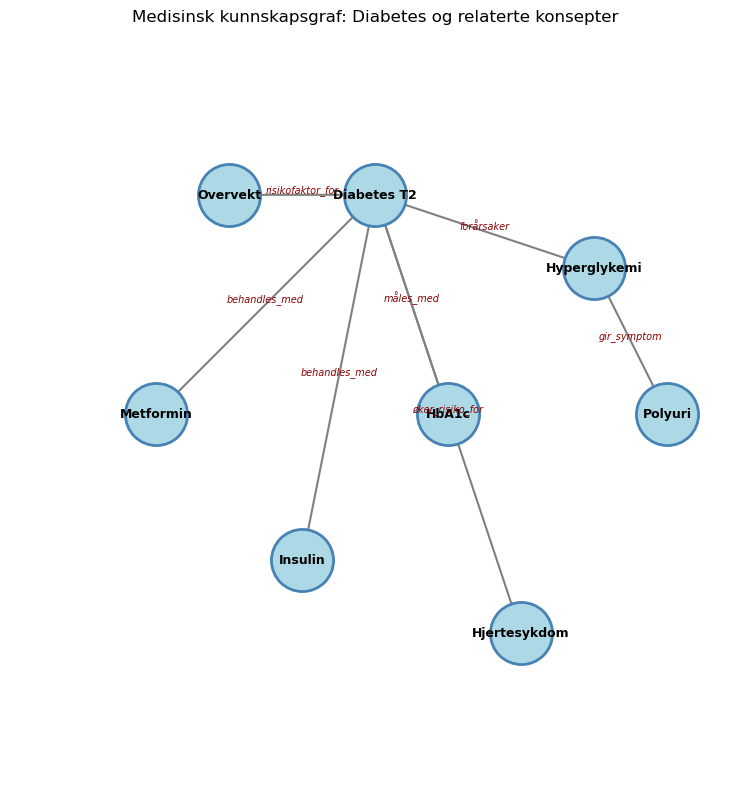

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Enkel kunnskapsgraf-visualisering

def tegn_medisinsk_kunnskapsgraf():
    """
    Tegner en enkel medisinsk kunnskapsgraf.
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Definer noder (entiteter)
    noder = {
        'Diabetes T2': (0.5, 0.8),
        'Metformin': (0.2, 0.5),
        'Insulin': (0.4, 0.3),
        'Hyperglykemi': (0.8, 0.7),
        'Polyuri': (0.9, 0.5),
        'HbA1c': (0.6, 0.5),
        'Overvekt': (0.3, 0.8),
        'Hjertesykdom': (0.7, 0.2)
    }
    
    # Definer kanter (relasjoner)
    kanter = [
        ('Diabetes T2', 'Metformin', 'behandles_med'),
        ('Diabetes T2', 'Insulin', 'behandles_med'),
        ('Diabetes T2', 'Hyperglykemi', 'forårsaker'),
        ('Hyperglykemi', 'Polyuri', 'gir_symptom'),
        ('Diabetes T2', 'HbA1c', 'måles_med'),
        ('Overvekt', 'Diabetes T2', 'risikofaktor_for'),
        ('Diabetes T2', 'Hjertesykdom', 'øker_risiko_for')
    ]
    
    # Tegn noder
    for navn, (x, y) in noder.items():
        ax.scatter(x, y, s=2000, c='lightblue', edgecolors='steelblue', linewidths=2, zorder=3)
        ax.annotate(navn, (x, y), ha='center', va='center', fontsize=9, fontweight='bold')
    
    # Tegn kanter
    for fra, til, relasjon in kanter:
        x1, y1 = noder[fra]
        x2, y2 = noder[til]
        
        # Tegn pil
        ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                    arrowprops=dict(arrowstyle='->', color='gray', lw=1.5),
                    zorder=1)
        
        # Legg til relasjonsnavn
        midx, midy = (x1 + x2) / 2, (y1 + y2) / 2
        ax.annotate(relasjon, (midx, midy), fontsize=7, color='darkred',
                    ha='center', va='bottom', style='italic')
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Medisinsk kunnskapsgraf: Diabetes og relaterte konsepter', fontsize=12, pad=20)
    
    plt.tight_layout()
    plt.show()

tegn_medisinsk_kunnskapsgraf()

---

## 4. Medisinske ontologier

Medisinen har utviklet omfattende ontologier - strukturerte vokabularer med definerte begreper og relasjoner.

### Viktige medisinske ontologier

| Ontologi | Beskrivelse | Bruksområde |
|----------|-------------|-------------|
| **SNOMED CT** | Comprehensive clinical terminology | Klinisk dokumentasjon |
| **ICD-10/11** | International Classification of Diseases | Diagnosekoding |
| **LOINC** | Logical Observation Identifiers | Laboratorietester |
| **RxNorm** | Normalized drug names | Legemidler |
| **HPO** | Human Phenotype Ontology | Genetikk/fenotyper |

### Hvordan ontologier styrker AI

1. **Standardisering**: Felles språk på tvers av systemer
2. **Resonnering**: Utlede ny kunnskap fra relasjoner
3. **Validering**: Sjekke konsistens i data
4. **Forklaring**: Gi meningsfulle forklaringer

In [3]:
# Eksempel på ontologi-basert resonnering

def ontologi_resonnering():
    """
    Demonstrerer hvordan ontologi-kunnskap kan forbedre AI-resonnering.
    """
    # Simulert kunnskapsbase
    ontologi = {
        "is_a": {
            "Metformin": "Antidiabetikum",
            "Antidiabetikum": "Legemiddel",
            "Insulin": "Antidiabetikum"
        },
        "treats": {
            "Antidiabetikum": "Diabetes"
        },
        "contraindicated": {
            "Metformin": "Nyresvikt"
        }
    }
    
    print("ONTOLOGI-BASERT RESONNERING")
    print("=" * 50)
    
    # Resonnering: "Behandler Metformin diabetes?"
    print("\nSpørsmål: Behandler Metformin diabetes?")
    print("\nResonnering:")
    print("  1. Metformin IS_A Antidiabetikum")
    print("  2. Antidiabetikum TREATS Diabetes")
    print("  → Konklusjon: JA, Metformin behandler Diabetes")
    
    print("\n" + "-"*50)
    
    # Resonnering med kontraindikasjon
    print("\nSpørsmål: Kan pasient med nyresvikt bruke Metformin?")
    print("\nResonnering:")
    print("  1. Metformin CONTRAINDICATED Nyresvikt")
    print("  → Konklusjon: NEI, kontraindisert ved nyresvikt")
    print("  → VARSEL: Vurder alternativ (f.eks. Insulin)")

ontologi_resonnering()

ONTOLOGI-BASERT RESONNERING

Spørsmål: Behandler Metformin diabetes?

Resonnering:
  1. Metformin IS_A Antidiabetikum
  2. Antidiabetikum TREATS Diabetes
  → Konklusjon: JA, Metformin behandler Diabetes

--------------------------------------------------

Spørsmål: Kan pasient med nyresvikt bruke Metformin?

Resonnering:
  1. Metformin CONTRAINDICATED Nyresvikt
  → Konklusjon: NEI, kontraindisert ved nyresvikt
  → VARSEL: Vurder alternativ (f.eks. Insulin)


---

## 5. Anvendelser i medisin

### Eksempler på nevrosymbolsk AI i helse

**1. Diagnose-støtte med forklaring**
- Nevralt: Klassifiserer symptomer
- Symbolsk: Forklarer via medisinsk ontologi

**2. Legemiddelinteraksjoner**
- Nevralt: Predikerer interaksjonsrisiko
- Symbolsk: Verifiserer mot farmakologisk kunnskap

**3. Klinisk beslutningsstøtte**
- Nevralt: Risikostratifisering fra data
- Symbolsk: Sjekker mot kliniske retningslinjer

**4. Biobank-analyse**
- Nevralt: Finner mønstre i genomdata
- Symbolsk: Kobler til fenotype-ontologi

In [4]:
# Eksempel: Hybrid diagnose-system

def hybrid_diagnose_system(symptomer):
    """
    Simulerer et nevrosymbolsk diagnosesystem.
    """
    print("HYBRID DIAGNOSE-SYSTEM")
    print("=" * 60)
    print(f"Input symptomer: {symptomer}")
    print()
    
    # Steg 1: Nevral komponent (simulert)
    print("STEG 1: Nevral analyse")
    print("-" * 40)
    nevral_prediksjoner = {
        "Diabetes mellitus": 0.75,
        "Hyperthyreose": 0.15,
        "Nyresykdom": 0.10
    }
    for diag, prob in nevral_prediksjoner.items():
        print(f"  {diag}: {prob:.0%}")
    
    print()
    
    # Steg 2: Symbolsk validering
    print("STEG 2: Symbolsk validering (ontologi-sjekk)")
    print("-" * 40)
    print("  Sjekker: 'Polyuri' er kjent symptom på 'Diabetes'? ✓")
    print("  Sjekker: 'Vekttap' er kjent symptom på 'Diabetes'? ✓")
    print("  Sjekker: 'Tørste' er kjent symptom på 'Diabetes'? ✓")
    print("  → Alle symptomer er ontologisk konsistente med Diabetes")
    
    print()
    
    # Steg 3: Kombinert output
    print("STEG 3: Forklaring til kliniker")
    print("-" * 40)
    print("""  ANBEFALING: Vurder Diabetes mellitus (75% sannsynlighet)
  
  BEGRUNNELSE:
  - Nevral modell identifiserte mønster konsistent med diabetes
  - Symptomene (polyuri, vekttap, tørste) er alle klassiske
    diabetes-symptomer ifølge SNOMED CT
  
  ANBEFALT UTREDNING:
  - Fastende blodglukose
  - HbA1c
  """)

# Test
hybrid_diagnose_system(["polyuri", "vekttap", "økt tørste"])

HYBRID DIAGNOSE-SYSTEM
Input symptomer: ['polyuri', 'vekttap', 'økt tørste']

STEG 1: Nevral analyse
----------------------------------------
  Diabetes mellitus: 75%
  Hyperthyreose: 15%
  Nyresykdom: 10%

STEG 2: Symbolsk validering (ontologi-sjekk)
----------------------------------------
  Sjekker: 'Polyuri' er kjent symptom på 'Diabetes'? ✓
  Sjekker: 'Vekttap' er kjent symptom på 'Diabetes'? ✓
  Sjekker: 'Tørste' er kjent symptom på 'Diabetes'? ✓
  → Alle symptomer er ontologisk konsistente med Diabetes

STEG 3: Forklaring til kliniker
----------------------------------------
  ANBEFALING: Vurder Diabetes mellitus (75% sannsynlighet)
  
  BEGRUNNELSE:
  - Nevral modell identifiserte mønster konsistent med diabetes
  - Symptomene (polyuri, vekttap, tørste) er alle klassiske
    diabetes-symptomer ifølge SNOMED CT
  
  ANBEFALT UTREDNING:
  - Fastende blodglukose
  - HbA1c
  


---

## 6. Fremtidsperspektiver

### Hvorfor nevrosymbolsk AI er viktig for medisin

1. **Forklarbarhet**: Symbolsk kunnskap gir meningsfulle forklaringer
2. **Robusthet**: Ontologier fanger opp feil og inkonsistenser
3. **Datamangel**: Kan utnytte eksisterende medisinsk kunnskap
4. **Regulering**: Lettere å verifisere og godkjenne
5. **Tillit**: Leger forstår resonnementet

### Aktive forskningsområder

- Knowledge-enhanced LLMs (f.eks. kobling av GPT til SNOMED)
- Neural-symbolic reasoning i biomedisinske grafer
- Ontology learning fra ustrukturert tekst
- Forklaring av dype modeller via symbolsk mapping

---

## Oppsummering

### Hovedpunkter

1. **To AI-tradisjoner**: Symbolsk (tolkbar, regelbasert) vs. nevral (lærer fra data)
2. **Nevrosymbolsk AI** kombinerer styrkene til begge
3. **Kunnskapsgrafer** representerer medisinsk kunnskap som nettverk
4. **Ontologier** (SNOMED, ICD) gir standardisert vokabular
5. **Hybrid systemer** gir bedre forklarbarhet og robusthet

### Refleksjonsoppgaver

1. Hvordan kunne en kunnskapsgraf forbedret et AI-system du kjenner til?
2. Hvilke medisinske domener tror du har mest nytte av nevrosymbolsk AI?

---

*Neste notebook: [09 - ChatGPT/Claude API](09-chatgpt-claude-api.ipynb)*